<a id="top"></a>

# **4.3: Cyclic pullout of textile fabrics and CFRP sheets**

<!-- [![title](../fig/bmcs_video.png)](https://moodle.rwth-aachen.de/mod/page/view.php?id=619022) -->

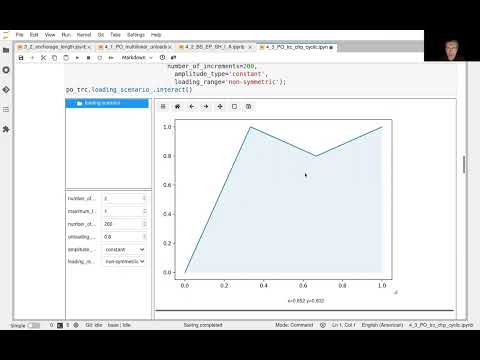

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ItmQQ9yQDjI')

<div style="background-color:lightgray;text-align:left"> <img src="../icons/start_flag.png" alt="Previous trip" width="40" height="40">
    &nbsp; &nbsp; <b>Starting point</b> </div> 

Once we have seen that there is a relation between the shape of the constitutive law and the  stress redistribution process within a bond zone which has an immediate consequence on the shape of the pullout curve, we extend our horizon to the case of **non-monotonic loading**.  

<div style="background-color:lightgray;text-align:left"> <img src="../icons/destination.png" alt="Previous trip" width="40" height="40">
    &nbsp; &nbsp; <b>Where are we heading</b> </div> 


To motivate a more general development of the model for the bond-slip behavior let us consider the case of non-monotonic loading. What happens in the material structure of the bond if the load is reduced and than it grows again?

<a id="trc_test"></a>
# **TRC pullout test modeled using plastic material model**

## Test results

<a id="trc_test_results"></a>
Consider again the test double-sided pullout test that was used to motivate the development of plastic material model in [notebook 4.1](4_1_PO_multilinear_unloading.ipynb#trc_study_monotonic) which demonstrated that no unloading branch could be reproduced. We reprint the test results for convenience here with the goal to examine the ability of the plastic model to reproduce the unloading stiffness of the specimen with the total length of 300 mm, i.e. $L_\mathrm{b} = 150$ mm.

![image](../fig/test_unloading.png)

## Pullout model setup

Let us first construct the model with the same geometry as specified in [notebook 3.2](../tour3_nonlinear_bond/3_2_anchorage_length.ipynb#trc_parameters). Note again that the maximum control displacement $w_\mathrm{max}$ is 
the half of the crack opening displacement measured in the test. Therefore `w_max` has been set to 3 mm.

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from bmcs_cross_section.pullout import PullOutModel1D
po_trc = PullOutModel1D(n_e_x=100, w_max=3) # mm 
po_trc.geometry.L_x=150 # [mm]
po_trc.time_line.step = 0.02
po_trc.cross_section.trait_set(A_m=1543, A_f=16.7, P_b=10);

## Material model with kinematic hardening

To apply the elastic-plastic model in this pullout model, set the the `elasto-plasticity` option for the `material_model` attribute. Then, the plastic model with the parameters $\tau_Y = \bar{\tau}, K, \gamma$ introduced in the [notebook 3.2](../tour3_nonlinear_bond/3_2_anchorage_length.ipynb#trc_pullout_study) can be set to the attribute `material_model_` using the `trait_set` method as follows

| parameter | name | value | unit |
| - | - | -: | - |
| bond stiffness | `E_b` | 6.4 | MPa |
| elastic limit stress | `tau_bar` | 4 | MPa |
| isotropic hardening modulus | `K` | 0 | MPa |
| kinematic hardening modulus | `gamma` | 1.0 | MPa |

Using these parameters, we aim to reproduce the same shape of the [bond slip law that was used previously in notebook 3.2](../tour3_nonlinear_bond/3_2_anchorage_length.ipynb#trc_parameters), represented as a tri-linear function for the simulation of the monotonically increasing load.

In [3]:
po_trc.material_model='elasto-plasticity'
po_trc.material_model_.trait_set(
    E_m=28000, E_f=170000, E_b=6.4, K = 0, gamma=1.0, tau_bar=4
);
po_trc.material_model_.interact()

## Load scenario

Finally, following the same mimic, we change the loading scenario from `monotonic` to `cyclic` and can set the parameters of the cyclic loading through the attribute with the trailing underscore `loading_scenario_`.
To verify the loading scenario we directly render the model component using the `interact` method. 

In [4]:
po_trc.loading_scenario.profile = 'cyclic-nonsym-const'
po_trc.loading_scenario.profile_.trait_set(number_of_cycles=2,
                              unloading_ratio=0.8,
                            number_of_increments=200,
                              );
po_trc.loading_scenario.interact()

xxxxx


## Run the simulation
Apparently, we apply directly the full control displacement, then reduce it to 80% and reload again to the maximum. Our intention is not to simulate the whole history displayed in the [test results](trc_test_results) but to compare the unloading stiffness reproduced by the model.
The model is now ready for execution so that let us run it and render the user interface to inspect the results.

In [5]:
po_trc.reset()
po_trc.run()
po_trc.interact()

## Discussion of the study

 - The predicted response reproduces the experimental response reasonably well. For the **short bond length** used in the test, the slip and shear profiles are nearly uniform along the bond zone.  - **Task:** Change the bond length to 200 mm and compare the response with the pull-out curve depicted in the [test results](#trc_test_results)
 - The main focus of the study at hand was the question, if the **unloading stiffness** corresponds to the initial stiffness, similarly to the test response. Since this is the case, the conclusion can be made, that the bond behavior in the tested TRC specimens is primarily governed by plasticity.
 - Since the model uses **linear hardening**, the pull-out response has a linear inelastic branch up to the point of unloading. The non-linear shape of the experimentally obtained curve cannot be reproduced in a better way. **Non-linear hardening** function instead of a single hardening modulus $\gamma$ can be theoretically included into the framework of plasticity. However, such enhancement requires a non-trivial systematic calibration procedure which would be able to uniquely associate the inelastic mechanisms governing the response to the hardening process, which is a non-trivial task. Such effort would only be justified for a material combination with large amount of practical applications. 

<a id="cfrp_test"></a>
# **CFRP sheet test with softening plastic material**

It is interesting to examine the ability of the plastic model with negative hardening, i.e. softening, to simulate the cyclic response of the CFRP sheets.

## Pullout model setup
Let us construct the model with these parameters and check the shape of the bond-slip relation

In [6]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from bmcs_cross_section.pullout import PullOutModel1D

A_f = 16.67 # [mm^2]
A_m = 1540.0 # [mm^2]
p_b = 100.0 #
E_f = 170000 # [MPa]
E_m = 28000 # [MPa]
pm = PullOutModel1D()
pm.sim.tline.step = 0.01 # 100 time increments
pm.cross_section.trait_set(A_f=A_f, P_b=p_b, A_m=A_m)
pm.geometry.L_x = 300 # length of the specimen [mm]
pm.w_max = 2.8 # maximum control displacement [mm]
pm.n_e_x = 100 # number of finite elements

## Material model with isotropic softening

The bond-slip law identified during the [**Tour 3:** (CFRP sheet test)](../tour3_nonlinear_bond/3_1_nonlinear_bond.ipynb#cfrp_bond_slip) can be reproduced by setting the parameters of
the plastic material model with isotropic hardening to:
| parameter | name | value | unit |
| - | - | -: | - |
| bond stiffness | `E_b` | 80 | MPa |
| elastic limit stress | `tau_bar` | 8 | MPa |
| isotropic hardening modulus | `K` | -20 | MPa |
| kinematic hardening modulus | `gamma` | 0 | MPa |


In [7]:
pm.material_model='elasto-plasticity'
pm.material_model_.trait_set(
    E_m=28000, E_f=170000, E_b=80, K = -20, gamma=0, tau_bar=8
)
pm.material_model_.interact()

<div style="background-color:lightgray;text-align:left"> <img src="../icons/remark.png" alt="Previous trip" width="40" height="40">
    &nbsp; &nbsp; <b>What is the difference compared to a trilinear bond-slip law used before?</b> </div> 

Apparently, the shape is identical to the [trilinear bond slip law](../tour3_nonlinear_bond/3_1_nonlinear_bond.ipynb#cfrp_trilinear_bond) law applied in the first analysis of this test setup. However, now unloading in inelastic regime would be governed by initial stiffness.
It is important to remark that the model has been augmented with an additional feature that prevents softening into negative stresses. To explain this minor but essential extension recal the shape of the yield condition for plastic model with isotropic hardening
\begin{align}
f = | \tau | - (\tau_Y - Z) 
\end{align}
where the hardening stress is given as $Z = K z$. With the negative value of hardening modulus $K$ and implicitly positive value of the hardening state variable $z$ we can notice that the size of the elastic domain $(\tau_Y - Z)$ shrinks with increasing $z$. Without any treatment, the elastic domain could reach a negative size, which is nonphysical. Thus, the criterion of the positive size of the elastic domain is used to define a third branch in the plastic model. 

**In fact,** with this necessary extension, we introduce **damage into a plastic model**, because we explicitly set the material stiffness at a predefined value of deformation, namely at the value of slip inducing the loss of elastic domain. As we will lear in Tour 5, relating the loss of stiffness to the measure of strain is the general concept behind damage models. : 

In this context, where we introduced an argument of physical admissibility, it is worth reminding that inelastic behavior implicitly induces **dissipation of energy**. A sound formulation of material models is only possible in the framework of thermodynamic laws that can guarantee an admissible behavior for any loading history. The evaluation of energy dissipation and its importance for objectivity and robustness of material models will be illuminated in **Tour 6**.

With the material model at hand, let us explore the response of the CFRP sheets in a cyclic loading scenario with symmetric, increasing amplitudes

## Load scenario

To see the effect of propagating softening plasticity upon unloading, let us apply four loading cycles oscillating applying the pull-out and push-in load in each cycle. Note that with this, 
a compressive stress is transferred by the FRP sheet upon push-in loading, which is unrealistic. 
Such response might be expected from a test on CFRP bars. Still the purpose of the study is 
to show the consequences of the applied assumptions on a broad scale of loading configuration and check the plausibility of the model response for a wider range of loading scenarios.

In [8]:
pm.loading_scenario.profile = 'cyclic-sym-incr'
pm.loading_scenario.profile_.trait_set(number_of_cycles=2,
                              unloading_ratio=0.5,
                            number_of_increments=200,
                              );
pm.reset()
pm.run()
pm.interact()

## Discussion of the study

 - By checking the `history` showing the field variables along the bond zone, we can observe the alternating tension and compression profiles in the reinforcement and in the matrix.
 - The shear transfer is again taking place only on a short length due to the softening nature of the bond behavior.
 - The yielding of the bond within the process zone occurs both under pullout and under push-in load as apparent from the existence of the hysteretic loop.
 - In contrast to the [study of TRC test](#trc_results), the unloading stiffness does not correspond to the initial stiffness. This question is discussed in a more detail below.  

<div style="background-color:lightgray;text-align:left"> <img src="../icons/question_puzzle.png" alt="Question" width="50" height="50">
    &nbsp; &nbsp; <b>Stimulating question</b> </div> 

# **Qualitative comparison of the two studies**

## **How to interpret unloading stiffness at structural level?**

In the classification of plasticity and damage models explained in  [4.1](4_1_PO_multilinear_unloading.ipynb#damage_and_plasticity) we have learned that in a single material point, plastic behavior unloads with initial stiffness and induces a persistent deformation $s_\mathrm{pl}$ at zero level of load. On the other hand, unloading of material point governed by damage behavior would recover all deformation and reach zero deformation at zero stress. **Can we assume such behavior of both class of models at the structural level?**

Comparing the slopes of the first unloading branch obtained for the [TRC test](#trc_test) and of the [CFRP test](cfrp_test), we can notice that in the former case, the unloading stiffness is indeed equal to the initial stiffness. In this case, governed by the hardening bond-slip law, the shear stress increases and decreases upon loading and unloading in all material points simultaneously. On the other hand, in the case of [CFRP test](cfrp_test) governed by softening, the debonded zone reaches zero stress level and does not contribute to stress transfer any more. As a result, the effective length of the bond zone becomes shorter, so that the structural stiffness upon unloading must be smaller than the initial stiffness.

**The conclusion** is, that an application of a plastic model with softening, 
is only valid up to the point at which the elastic domain vanished. From that point on, 
a full damage must be assumed. Therefore, the kind of model used in the simulation of the CFRP test can be regarded as a first version of a combined damage-plasticity model. 

## **When to apply isotropic and when kinematic hardening?**

In the two examples above, both kinematic and isotropic hardening has been used. In the first yielding step and upon the first unloading, there is no difference between the two parameters. They will only show a different behavior upon cyclic loading scenario. A correct distinction is only possible based on a test delivering several unloading and reloading cycles. Correct identification of the parameters is a demanding task which calls for a systematic and automated support in terms of calibration algorithms and validation procedures. 

<div style="background-color:lightgray;text-align:left;width:45%;display:inline-table;"> <img src="../icons/previous.png" alt="Previous trip" width="50" height="50">
    &nbsp; <a href="../tour4_plastic_bond/4_2_BS_EP_SH_I_A.ipynb#top">4.2 Basic concept of plasticity</a> 
</div><div style="background-color:lightgray;text-align:center;width:10%;display:inline-table;"> <a href="#top"><img src="../icons/compass.png" alt="Compass" width="50" height="50"></a></div><div style="background-color:lightgray;text-align:right;width:45%;display:inline-table;"> 
    <a href="../tour5_damage_bond/5_1_Introspect_Damage_Evolution_Damage_initiation.ipynb#top">5.1 Pullout simulation using damage model</a>&nbsp; <img src="../icons/next.png" alt="Previous trip" width="50" height="50"> </div> 